In [40]:
# Core Data Manipulation
import numpy as np
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Statistical Analysis
import scipy
from scipy import stats
from scipy.stats import (ttest_ind, ttest_rel, pearsonr, spearmanr, 
                         mannwhitneyu, wilcoxon, normaltest, levene,
                         chi2_contingency, kruskal)

# Machine Learning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras import layers, models

In [41]:
# ============================================================================
# LOAD AND INSPECT HEART FAILURE DATASET
# ============================================================================

print("="*80)
print("LOADING HEART FAILURE DATASET")
print("="*80)

# Load the dataset (adjust path as needed for Kaggle)
df = pd.read_csv('heart.csv')

print(f"\nDataset loaded successfully!")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*80)
print("FIRST 10 ROWS OF THE DATASET")
print("="*80)
display(df.head(10))

print("\n" + "="*80)
print("DATASET INFORMATION")
print("="*80)
df.info()

print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)
display(df.describe())

print("\n" + "="*80)
print("COLUMN NAMES AND TYPES")
print("="*80)
for col in df.columns:
    print(f"   • {col:20s} → {str(df[col].dtype):10s} | Unique: {df[col].nunique():4d} | Nulls: {df[col].isnull().sum():4d}")

LOADING HEART FAILURE DATASET

Dataset loaded successfully!
Dataset shape: 918 rows × 12 columns
Memory usage: 0.27 MB

FIRST 10 ROWS OF THE DATASET


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0



DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

STATISTICAL SUMMARY


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



COLUMN NAMES AND TYPES
   • Age                  → int64      | Unique:   50 | Nulls:    0
   • Sex                  → object     | Unique:    2 | Nulls:    0
   • ChestPainType        → object     | Unique:    4 | Nulls:    0
   • RestingBP            → int64      | Unique:   67 | Nulls:    0
   • Cholesterol          → int64      | Unique:  222 | Nulls:    0
   • FastingBS            → int64      | Unique:    2 | Nulls:    0
   • RestingECG           → object     | Unique:    3 | Nulls:    0
   • MaxHR                → int64      | Unique:  119 | Nulls:    0
   • ExerciseAngina       → object     | Unique:    2 | Nulls:    0
   • Oldpeak              → float64    | Unique:   53 | Nulls:    0
   • ST_Slope             → object     | Unique:    3 | Nulls:    0
   • HeartDisease         → int64      | Unique:    2 | Nulls:    0



MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------
        Column  Missing_Count  Missing_Percentage
           Age              0                 0.0
           Sex              0                 0.0
 ChestPainType              0                 0.0
     RestingBP              0                 0.0
   Cholesterol              0                 0.0
     FastingBS              0                 0.0
    RestingECG              0                 0.0
         MaxHR              0                 0.0
ExerciseAngina              0                 0.0
       Oldpeak              0                 0.0
      ST_Slope              0                 0.0
  HeartDisease              0                 0.0

No missing values detected! Dataset is complete.

DUPLICATE ROWS ANALYSIS
--------------------------------------------------------------------------------
   Duplicate rows: 0
   No duplicate rows found!

DATA TYPES VERIFICATION
--------------

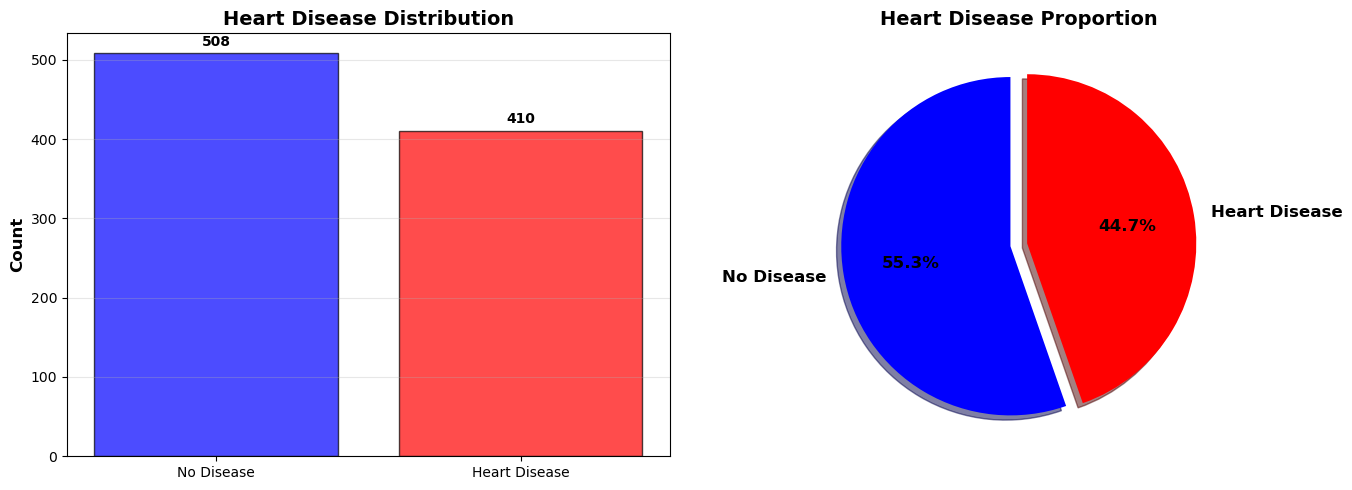

In [42]:
# ============================================================================
# DATA QUALITY ASSESSMENT
# ============================================================================

# Missing Values
print("\nMISSING VALUES ANALYSIS")
print("-"*80)
missing_count = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_count.values,
    'Missing_Percentage': missing_pct.values
}).sort_values('Missing_Count', ascending=False)

print(missing_df.to_string(index=False))

if missing_df['Missing_Count'].sum() == 0:
    print("\nNo missing values detected! Dataset is complete.")
else:
    print(f"\n⚠️ Total missing values: {missing_df['Missing_Count'].sum()}")

# Duplicate Rows
print("\n" + "="*80)
print("DUPLICATE ROWS ANALYSIS")
print("-"*80)
duplicates = df.duplicated().sum()
print(f"   Duplicate rows: {duplicates}")
if duplicates == 0:
    print("   No duplicate rows found!")
else:
    print(f"   {duplicates} duplicate rows detected")

# Data Types
print("\n" + "="*80)
print("DATA TYPES VERIFICATION")
print("-"*80)
print(df.dtypes)

# Target Variable Distribution
print("\n" + "="*80)
print("TARGET VARIABLE DISTRIBUTION")
print("-"*80)
target_counts = df['HeartDisease'].value_counts()
target_pct = df['HeartDisease'].value_counts(normalize=True) * 100

print(f"\n   Heart Disease = 1 (Positive): {target_counts[1]:4d} ({target_pct[1]:.2f}%)")
print(f"   Heart Disease = 0 (Negative): {target_counts[0]:4d} ({target_pct[0]:.2f}%)")

if abs(target_pct[0] - target_pct[1]) < 15:
    print("\n   Dataset is relatively balanced!")
elif abs(target_pct[0] - target_pct[1]) < 30:
    print("\n   Slight class imbalance detected")
else:
    print("\n   Significant class imbalance - consider resampling techniques")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['No Disease', 'Heart Disease'], target_counts.values, 
            color=['blue', 'red'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Heart Disease Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
colors_pie = ['#2ECC71', '#E74C3C']
axes[1].pie(target_counts.values, labels=['No Disease', 'Heart Disease'], 
            autopct='%1.1f%%', colors=['blue', 'red'], startangle=90,
            explode=(0.05, 0.05), shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Heart Disease Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)

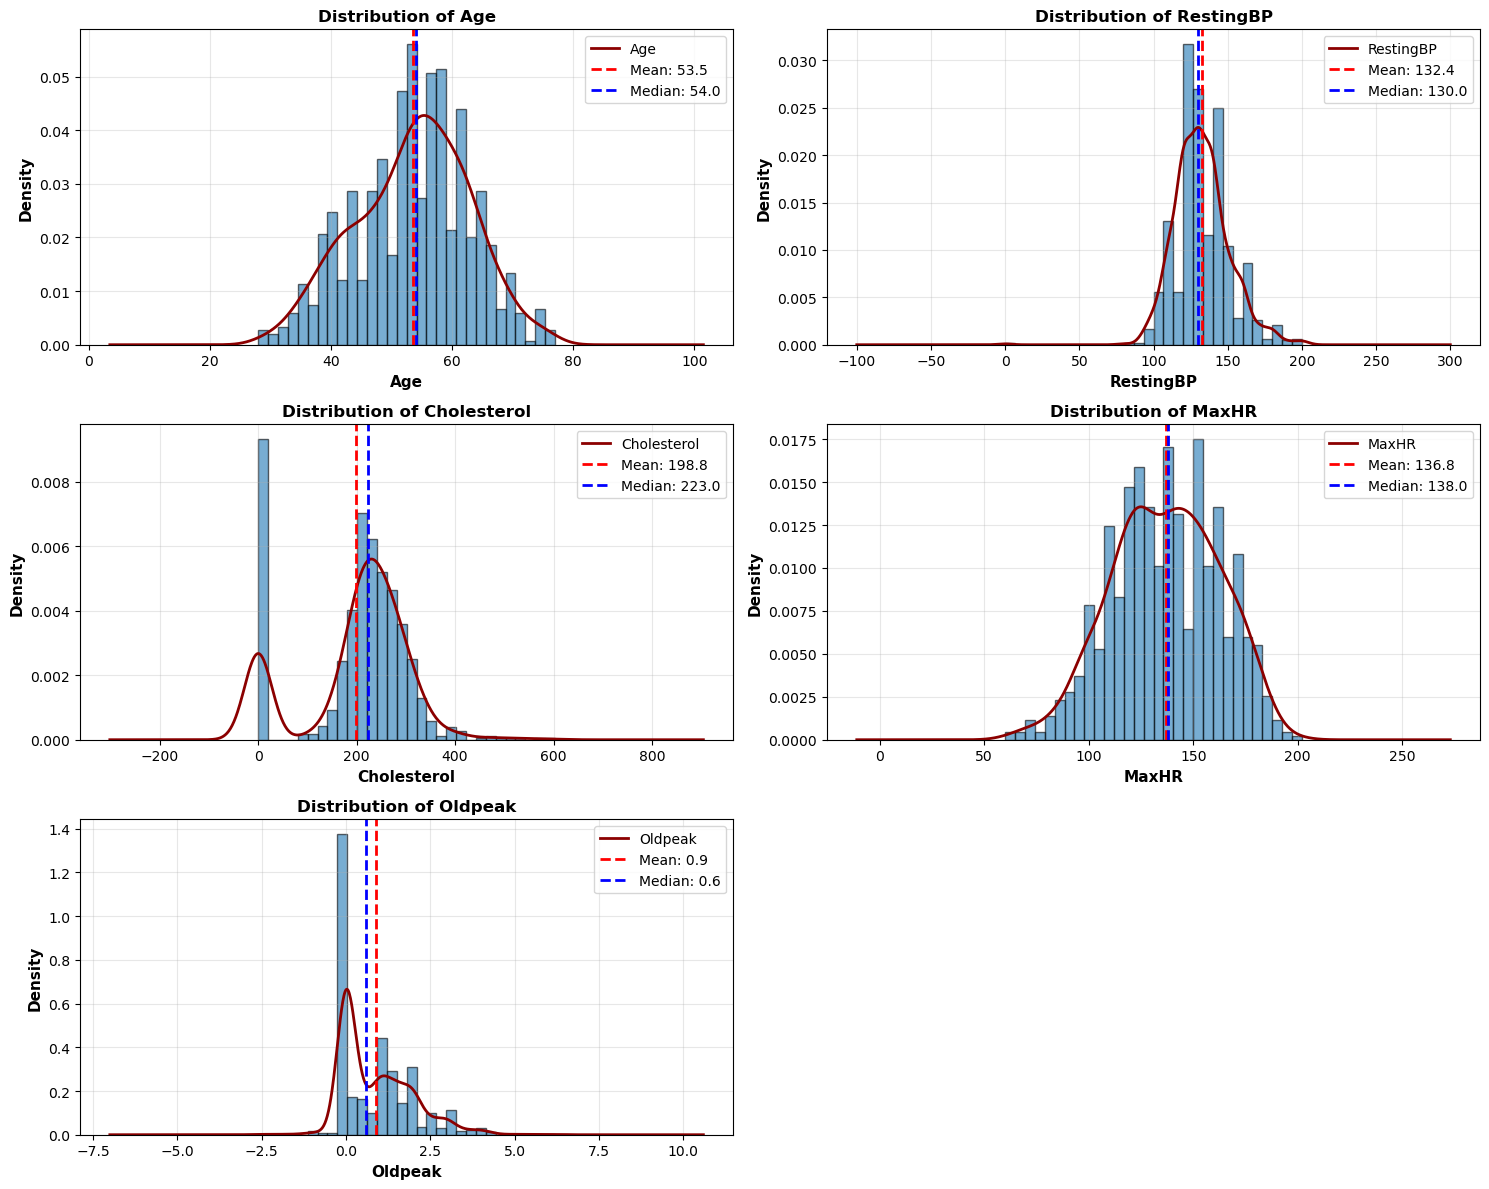

In [43]:
# ============================================================================
# NUMERICAL FEATURES DISTRIBUTION ANALYSIS
# ============================================================================
# Identify numerical columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create distribution plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    # Histogram with KDE
    axes[idx].hist(df[col], bins=30, alpha=0.6, edgecolor='black', density=True)
    
    # KDE overlay
    df[col].plot(kind='density', ax=axes[idx], color='darkred', linewidth=2)
    
    axes[idx].set_xlabel(col, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Density', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)
    
    # Add statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    axes[idx].legend()

# Remove extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()


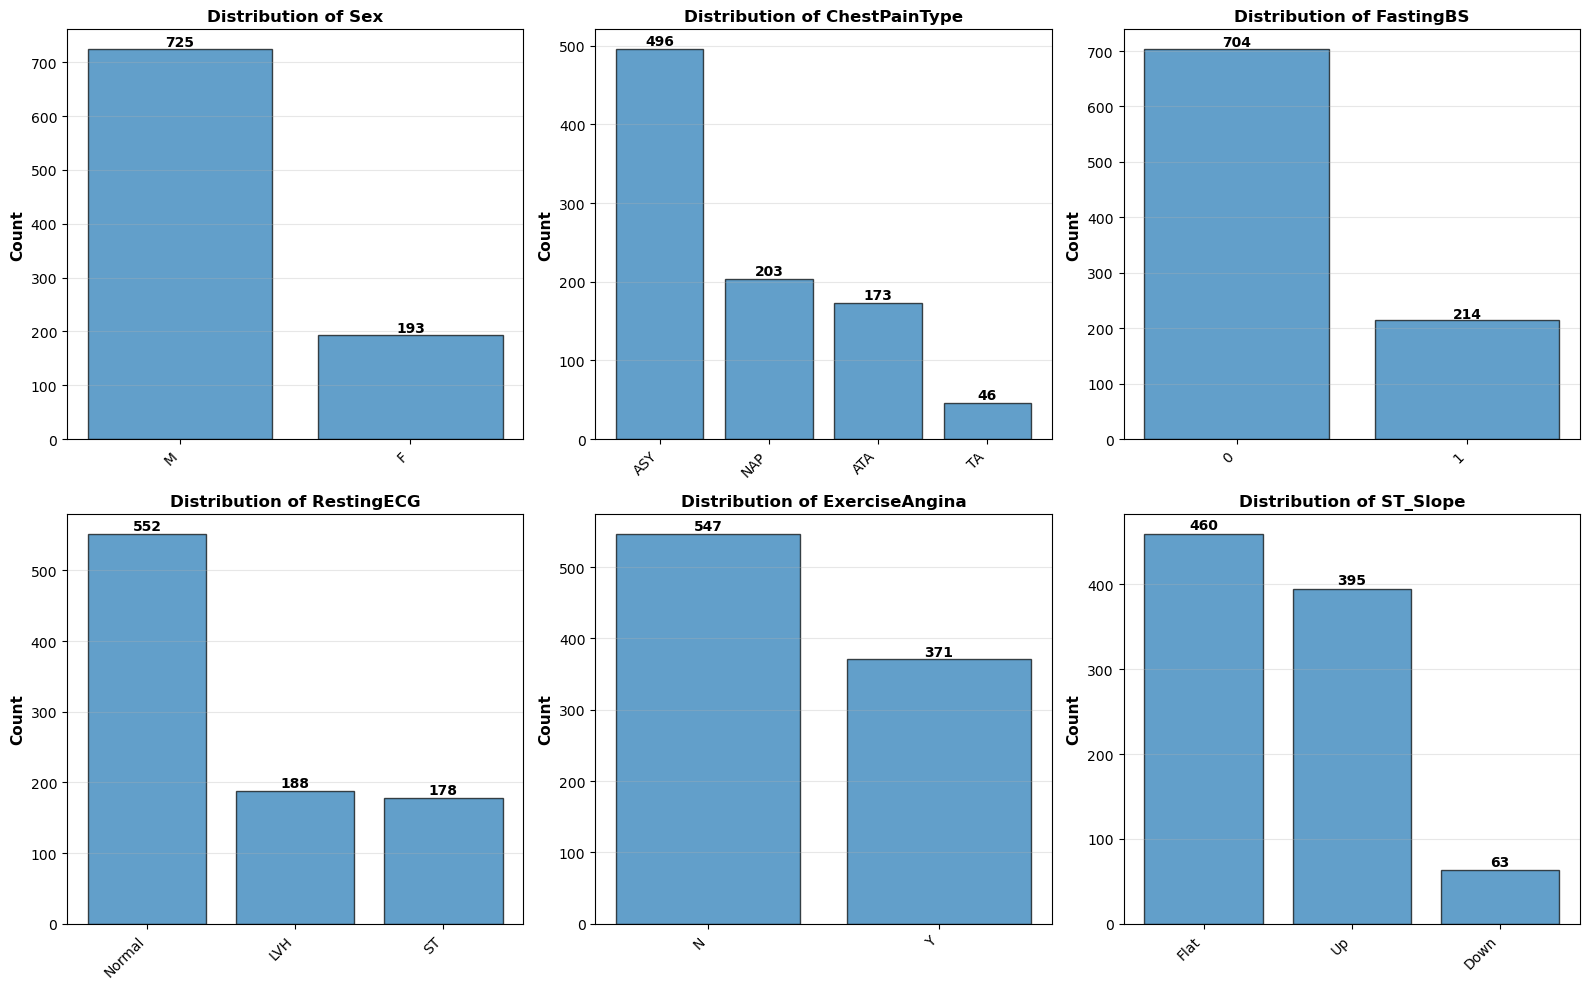

In [44]:
# ============================================================================
# CATEGORICAL FEATURES DISTRIBUTION ANALYSIS
# ============================================================================
# Identify categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 
                   'ExerciseAngina', 'ST_Slope']

# Create count plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    # Count plot
    value_counts = df[col].value_counts()
    
    axes[idx].bar(range(len(value_counts)), value_counts.values, alpha=0.7, edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_ylabel('Count', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add count labels
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

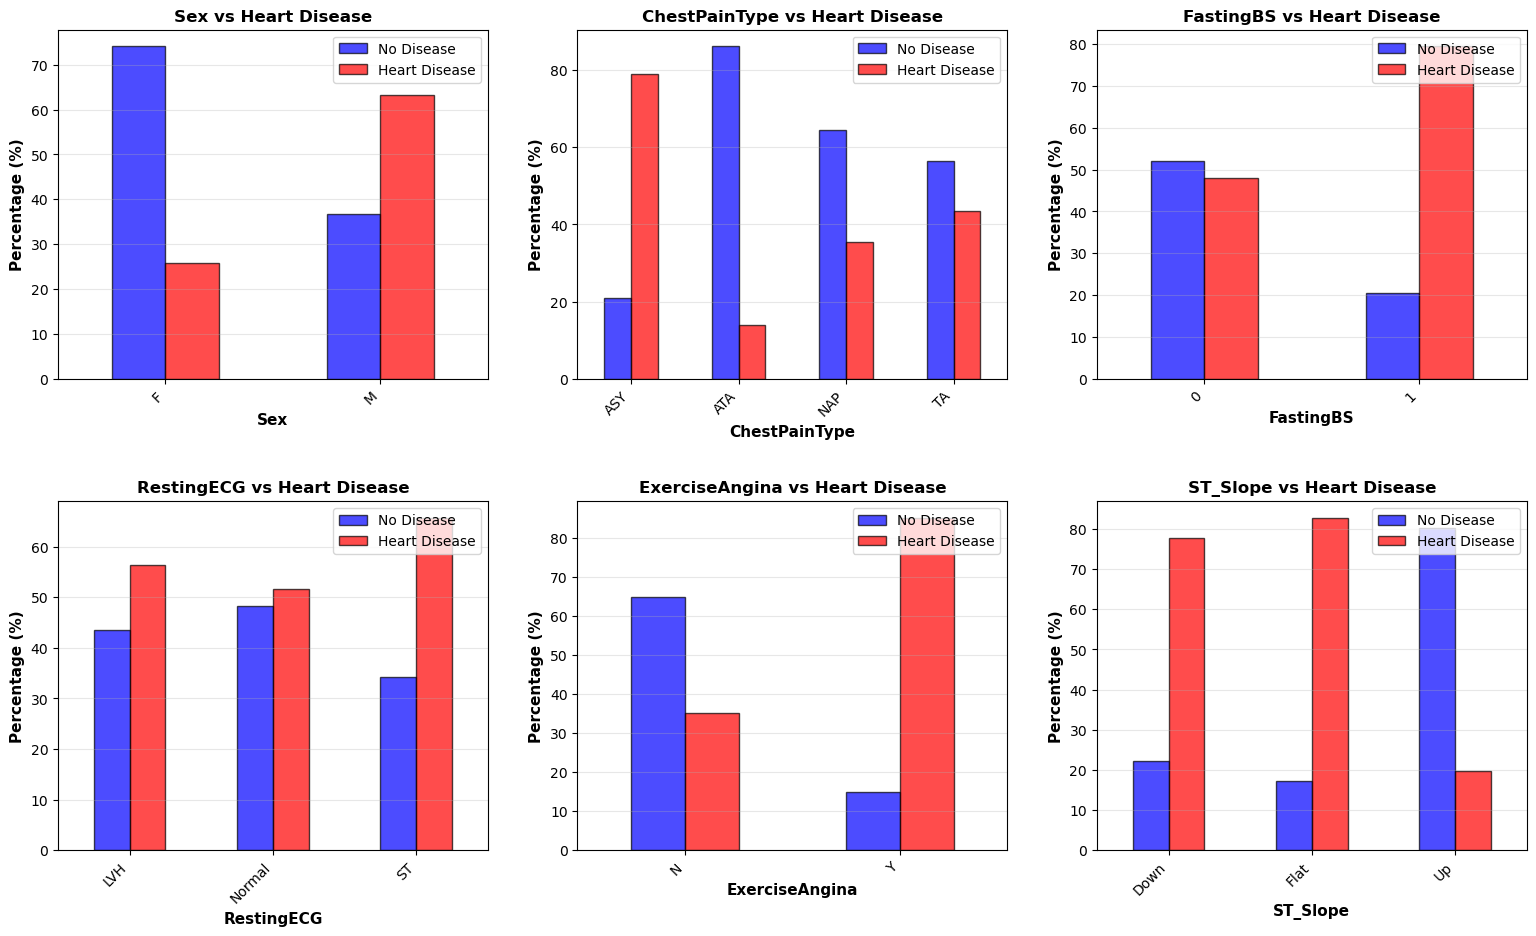

In [45]:
# ============================================================================
# CATEGORICAL FEATURES VS HEART DISEASE
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    # Create contingency table
    ct = pd.crosstab(df[col], df['HeartDisease'], normalize='index') * 100
    
    # Stacked bar plot
    ct.plot(kind='bar', stacked=False, ax=axes[idx], 
            color=['blue', 'red'], alpha=0.7, edgecolor='black')
    
    axes[idx].set_xlabel(col, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{col} vs Heart Disease', fontsize=12, fontweight='bold')
    axes[idx].legend(['No Disease', 'Heart Disease'], loc='upper right')
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(pad=3.0)
plt.show()

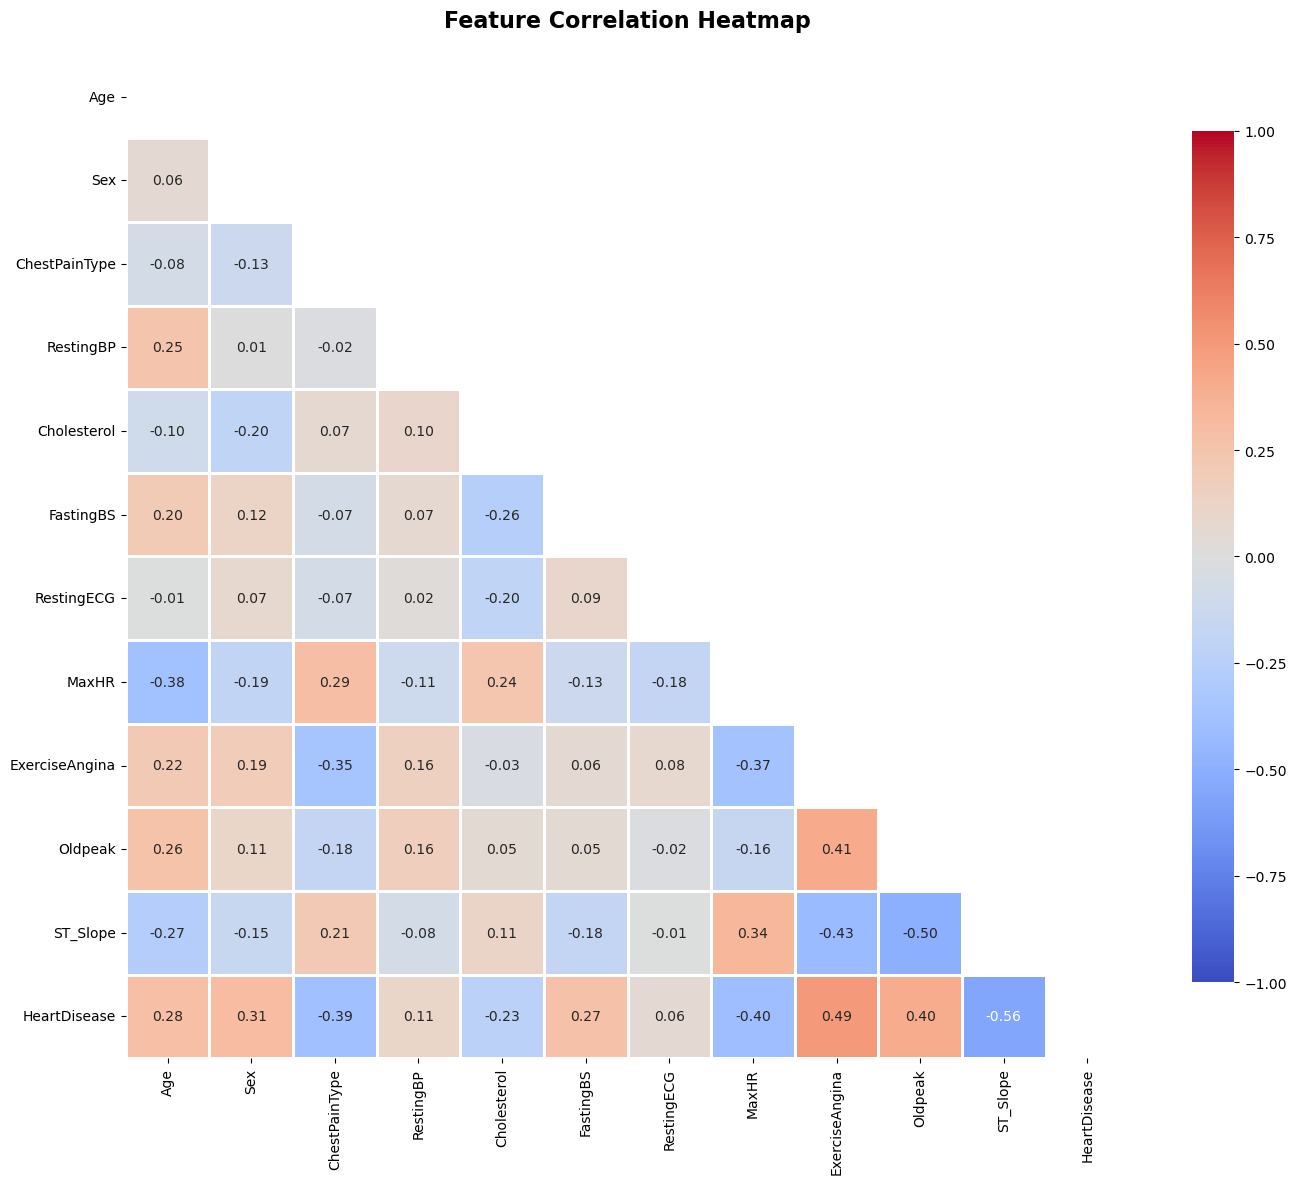

In [46]:
# ============================================================================
# CORRELATION ANALYSIS
# ============================================================================

# Encode categorical variables for correlation
df_encoded = df.copy()

# Label encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df[col])

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(14, 12))

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8}, ax=ax, vmin=-1, vmax=1)

ax.set_title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


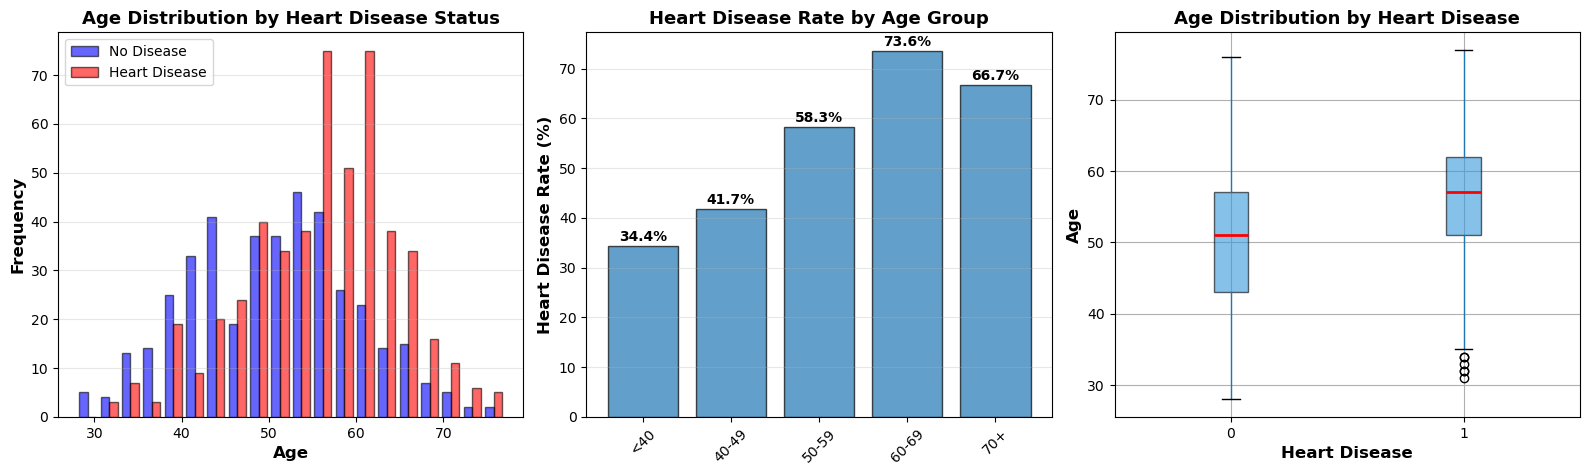

In [47]:
# ============================================================================
# AGE ANALYSIS
# ============================================================================

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 40, 50, 60, 70, 100], 
                        labels=['<40', '40-49', '50-59', '60-69', '70+'])

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Age distribution by heart disease
axes[0].hist([df[df['HeartDisease']==0]['Age'], df[df['HeartDisease']==1]['Age']], 
             bins=20, label=['No Disease', 'Heart Disease'], 
             color=['blue', 'red'], alpha=0.6, edgecolor='black')
axes[0].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Age Distribution by Heart Disease Status', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Heart disease rate by age group
age_disease = df.groupby('AgeGroup')['HeartDisease'].agg(['sum', 'count'])
age_disease['rate'] = (age_disease['sum'] / age_disease['count']) * 100

axes[1].bar(range(len(age_disease)), age_disease['rate'], alpha=0.7, edgecolor='black')
axes[1].set_xticks(range(len(age_disease)))
axes[1].set_xticklabels(age_disease.index, rotation=45)
axes[1].set_ylabel('Heart Disease Rate (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Heart Disease Rate by Age Group', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add percentage labels
for i, v in enumerate(age_disease['rate']):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# Box plot
df.boxplot(column='Age', by='HeartDisease', ax=axes[2], 
          patch_artist=True, 
          boxprops=dict(facecolor='#3498DB', alpha=0.6),
          medianprops=dict(color='red', linewidth=2))
axes[2].set_xlabel('Heart Disease', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Age', fontsize=12, fontweight='bold')
axes[2].set_title('Age Distribution by Heart Disease', fontsize=13, fontweight='bold')
axes[2].get_figure().suptitle('')

plt.tight_layout()
plt.show()


In [48]:
# ============================================================================
# DATA PREPROCESSING FOR MACHINE LEARNING
# ============================================================================

# Prepare features for modeling
df_model = df.copy()

# Encode categorical variables
le = LabelEncoder()

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_features:
    df_model[col + '_Encoded'] = le.fit_transform(df_model[col])

# Select features for modeling
feature_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
                'Sex_Encoded', 'ChestPainType_Encoded', 'RestingECG_Encoded', 
                'ExerciseAngina_Encoded', 'ST_Slope_Encoded']

X = df_model[feature_cols]
y = df_model['HeartDisease']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display feature names
print("\nFEATURES USED FOR MODELING")
for i, feat in enumerate(feature_cols, 1):
    print(f"   {i:2d}. {feat}")



FEATURES USED FOR MODELING
    1. Age
    2. RestingBP
    3. Cholesterol
    4. FastingBS
    5. MaxHR
    6. Oldpeak
    7. Sex_Encoded
    8. ChestPainType_Encoded
    9. RestingECG_Encoded
   10. ExerciseAngina_Encoded
   11. ST_Slope_Encoded


In [49]:
# ============================================================================
# TRAIN MULTIPLE MACHINE LEARNING MODELS
# ============================================================================
# Initialize models (Logistic Regression, Random Forest, and Deep Learning)
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100, 
        max_depth=10, 
        random_state=42, 
        n_jobs=-1
    ),
    'Feedforward (Neural Network)': 'DNN'  # placeholder
}

# Storage for results
results = []
trained_models = {}

print("\nTraining in progress...\n")

for name, model in models.items():
    print(f"{'='*70}")
    print(f"Training: {name}")
    print(f"{'='*70}")
    
    try:
        if name == 'Feedforward (Neural Network)':
            # Build neural network
            model = Sequential([
                Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
                Dropout(0.3),
                Dense(64, activation='relu'),
                Dropout(0.3),
                Dense(1, activation='sigmoid')
            ])

            # Compile model
            model.compile(optimizer=Adam(learning_rate=0.001),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])
            
            # Train model
            history = model.fit(
                X_train_scaled, y_train, 
                epochs=50, 
                batch_size=32, 
                validation_data=(X_test_scaled, y_test),
                verbose=0
            )

            # Predictions
            y_pred_proba_test = model.predict(X_test_scaled).ravel()
            y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

            y_pred_proba_train = model.predict(X_train_scaled).ravel()
            y_pred_train = (y_pred_proba_train >= 0.5).astype(int)

        else:
            # Train classical ML model
            model.fit(X_train_scaled, y_train)

            # Predictions
            y_pred_train = model.predict(X_train_scaled)
            y_pred_test = model.predict(X_test_scaled)
            
            # Prediction probabilities
            if hasattr(model, "predict_proba"):
                y_pred_proba_test = model.predict_proba(X_test_scaled)[:, 1]
            else:
                y_pred_proba_test = y_pred_test

        # Metrics - Training
        train_acc = accuracy_score(y_train, y_pred_train)
        train_precision = precision_score(y_train, y_pred_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_f1 = f1_score(y_train, y_pred_train)
        
        # Metrics - Test
        test_acc = accuracy_score(y_test, y_pred_test)
        test_precision = precision_score(y_test, y_pred_test)
        test_recall = recall_score(y_test, y_pred_test)
        test_f1 = f1_score(y_test, y_pred_test)
        test_auc = roc_auc_score(y_test, y_pred_proba_test)
        
        # Store results
        results.append({
            'Model': name,
            'Train_Accuracy': train_acc,
            'Test_Accuracy': test_acc,
            'Test_Precision': test_precision,
            'Test_Recall': test_recall,
            'Test_F1': test_f1,
            'Test_AUC': test_auc,
            'Overfit_Gap': train_acc - test_acc
        })
        
        # Store trained model
        trained_models[name] = {
            'model': model,
            'predictions': y_pred_test,
            'probabilities': y_pred_proba_test
        }
        
        # Print results
        print(f"   Training Performance:")
        print(f"      Accuracy:  {train_acc:.4f}")
        print(f"      Precision: {train_precision:.4f}")
        print(f"      Recall:    {train_recall:.4f}")
        print(f"      F1-Score:  {train_f1:.4f}")
        print(f"\n   Test Performance:")
        print(f"      Accuracy:  {test_acc:.4f}")
        print(f"      Precision: {test_precision:.4f}")
        print(f"      Recall:    {test_recall:.4f}")
        print(f"      F1-Score:  {test_f1:.4f}")
        print(f"      AUC-ROC:   {test_auc:.4f}")
        print(f"\n   Overfitting Gap: {train_acc - test_acc:.4f}")
        
        if train_acc - test_acc < 0.05:
            print(f"Good generalization!")
        elif train_acc - test_acc < 0.15:
            print(f"Moderate overfitting")
        else:
            print(f"High overfitting detected")
        print()
        
    except Exception as e:
        print(f"Error training {name}: {str(e)}\n")

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values('Test_F1', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)

# Best model
best_model_name = results_df.iloc[0]['Model']
best_model_acc = results_df.iloc[0]['Test_Accuracy']
best_model_f1 = results_df.iloc[0]['Test_F1']
best_model_auc = results_df.iloc[0]['Test_AUC']

print(f"\nBEST MODEL: {best_model_name}")
print(f"   • Test Accuracy: {best_model_acc:.4f} ({best_model_acc*100:.2f}%)")
print(f"   • Test F1-Score: {best_model_f1:.4f}")
print(f"   • Test AUC-ROC:  {best_model_auc:.4f}")
print("="*80)



Training in progress...

Training: Random Forest
   Training Performance:
      Accuracy:  0.9932
      Precision: 0.9878
      Recall:    1.0000
      F1-Score:  0.9939

   Test Performance:
      Accuracy:  0.8967
      Precision: 0.8807
      Recall:    0.9412
      F1-Score:  0.9100
      AUC-ROC:   0.9299

   Overfitting Gap: 0.0964
Moderate overfitting

Training: Feedforward (Neural Network)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
   Training Performance:
      Accuracy:  0.9223
      Precision: 0.9106
      Recall:    0.9532
      F1-Score:  0.9314

   Test Performance:
      Accuracy:  0.8750
      Precision: 0.8692
      Recall:    0.9118
      F1-Score:  0.8900
      AUC-ROC:   0.9267

   Overfitting Gap: 0.0473
Good generalization!


MODEL COMPARISON SUMMARY
                       Model  Train_Accuracy  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  Test_AUC  Overfit_Gap
               Random Forest        0.993188       0.896739

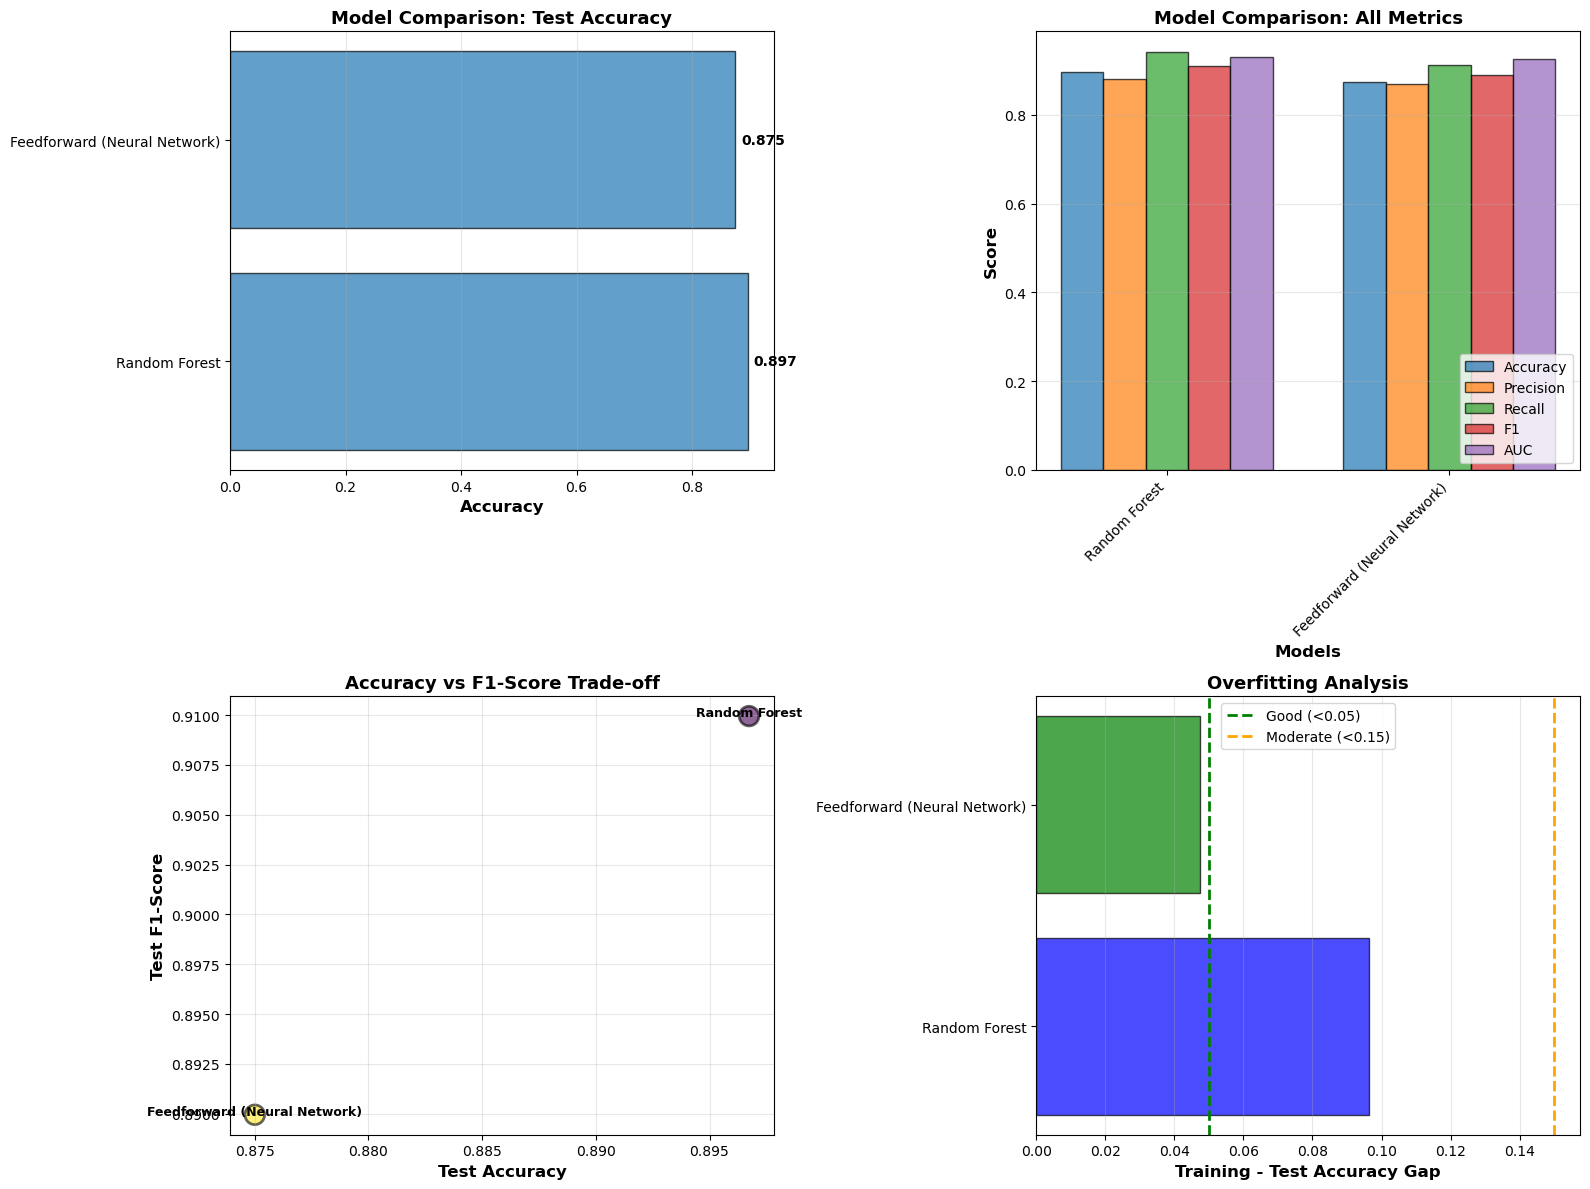

In [50]:
# ============================================================================
# MODEL COMPARISON VISUALIZATION
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Test Accuracy Comparison
axes[0, 0].barh(results_df['Model'], results_df['Test_Accuracy'], alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Accuracy', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Model Comparison: Test Accuracy', fontsize=13, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['Test_Accuracy']):
    axes[0, 0].text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# 2. Multiple Metrics Comparison
metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_AUC']
x = np.arange(len(results_df))
width = 0.15

for i, metric in enumerate(metrics):
    axes[0, 1].bar(x + i*width, results_df[metric], width, 
                   label=metric.replace('Test_', ''), 
                   alpha=0.7, edgecolor='black')

axes[0, 1].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Model Comparison: All Metrics', fontsize=13, fontweight='bold')
axes[0, 1].set_xticks(x + width * 2)
axes[0, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0, 1].legend(loc='lower right')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. F1-Score vs Accuracy
axes[1, 0].scatter(results_df['Test_Accuracy'], results_df['Test_F1'], 
                  s=200, c=range(len(results_df)), cmap='viridis', 
                  alpha=0.6, edgecolors='black', linewidth=2)
for i, model in enumerate(results_df['Model']):
    axes[1, 0].annotate(model, 
                       (results_df.iloc[i]['Test_Accuracy'], results_df.iloc[i]['Test_F1']),
                       fontsize=9, ha='center', fontweight='bold')
axes[1, 0].set_xlabel('Test Accuracy', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Test F1-Score', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Accuracy vs F1-Score Trade-off', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Overfitting Analysis
colors_overfit = ['green' if gap < 0.05 else 'blue' if gap < 0.15 else 'red' 
                  for gap in results_df['Overfit_Gap']]
axes[1, 1].barh(results_df['Model'], results_df['Overfit_Gap'], 
               color=colors_overfit, alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Training - Test Accuracy Gap', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Overfitting Analysis', fontsize=13, fontweight='bold')
axes[1, 1].axvline(x=0.05, color='green', linestyle='--', linewidth=2, label='Good (<0.05)')
axes[1, 1].axvline(x=0.15, color='orange', linestyle='--', linewidth=2, label='Moderate (<0.15)')
axes[1, 1].legend()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

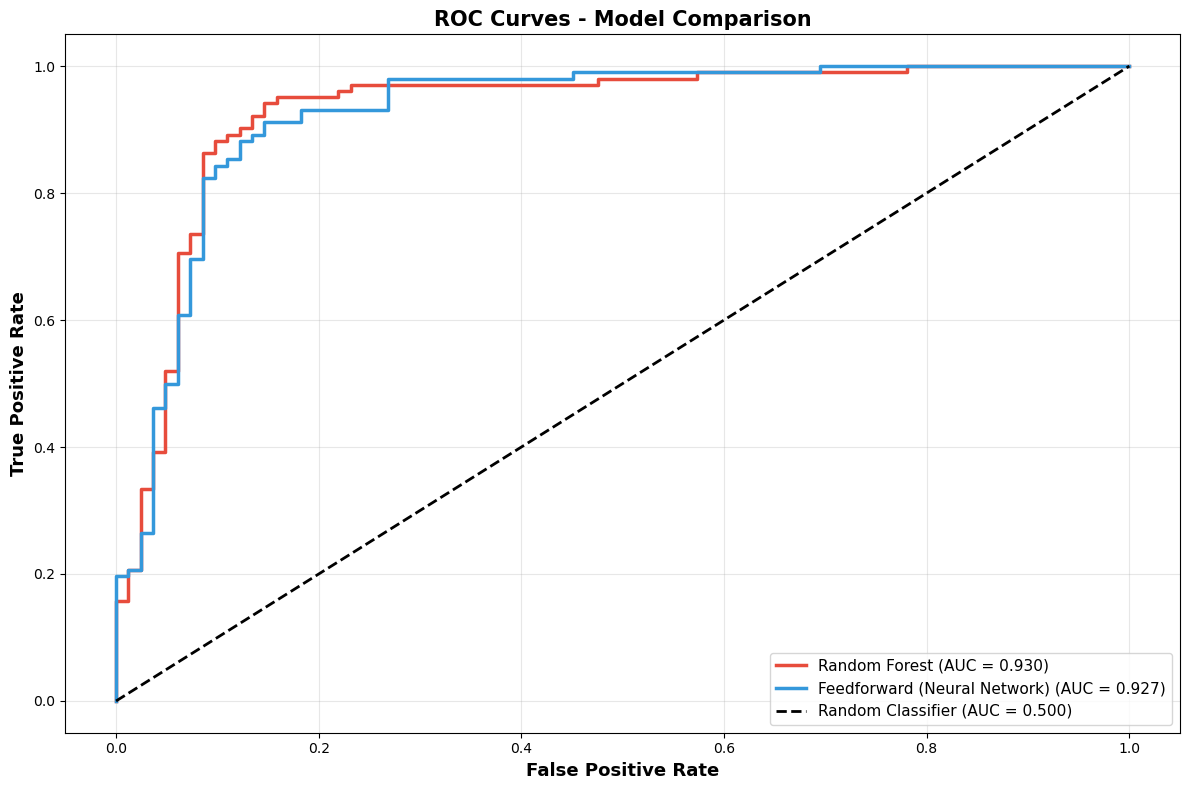

In [51]:
# ============================================================================
# ROC CURVES FOR ALL MODELS
# ============================================================================

fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6', '#E91E63', '#00BCD4']

for i, (name, model_dict) in enumerate(trained_models.items()):
    y_proba = model_dict['probabilities']
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    # Plot ROC curve
    ax.plot(fpr, tpr, linewidth=2.5, label=f'{name} (AUC = {auc_score:.3f})', 
            color=colors[i % len(colors)])

# Plot diagonal (random classifier)
ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.500)')

ax.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=13, fontweight='bold')
ax.set_title('ROC Curves - Model Comparison', fontsize=15, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

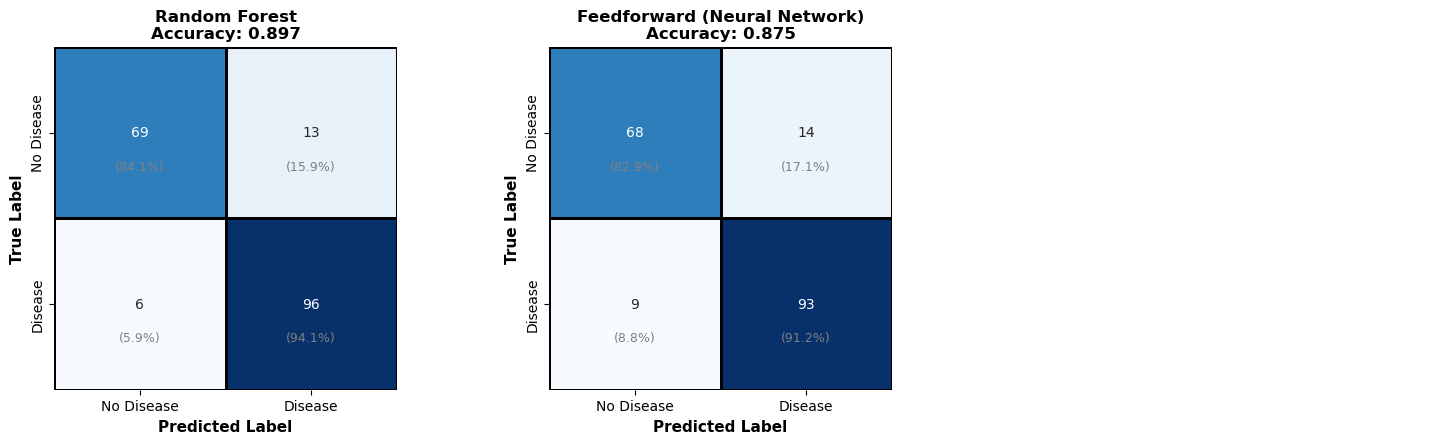


DETAILED CLASSIFICATION METRICS

Random Forest
              precision    recall  f1-score   support

  No Disease       0.92      0.84      0.88        82
     Disease       0.88      0.94      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184


Feedforward (Neural Network)
              precision    recall  f1-score   support

  No Disease       0.88      0.83      0.86        82
     Disease       0.87      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [52]:
# ============================================================================
# CONFUSION MATRICES FOR ALL MODELS
# ============================================================================
n_models = len(trained_models)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4.5))
axes = axes.ravel() if n_models > 1 else [axes]

for idx, (name, model_dict) in enumerate(trained_models.items()):
    y_pred = model_dict['predictions']
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate percentages
    cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                cbar=False, ax=axes[idx], 
                square=True, linewidths=2, linecolor='black')
    
    axes[idx].set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{name}\nAccuracy: {accuracy_score(y_test, y_pred):.3f}', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xticklabels(['No Disease', 'Disease'])
    axes[idx].set_yticklabels(['No Disease', 'Disease'])
    
    # Add percentage annotations
    for i in range(2):
        for j in range(2):
            axes[idx].text(j + 0.5, i + 0.7, f'({cm_pct[i, j]:.1f}%)', 
                          ha='center', va='center', fontsize=9, color='gray')

# Hide extra subplots
for idx in range(len(trained_models), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Print detailed metrics for each model
print("\nDETAILED CLASSIFICATION METRICS")
print("="*80)

for name, model_dict in trained_models.items():
    y_pred = model_dict['predictions']
    print(f"\n{'='*70}")
    print(f"{name}")
    print(f"{'='*70}")
    print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

In [53]:
# ============================================================================
# IMPORT LIBRARIES
# ============================================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# DATA PREPARATION 
# ============================================================================
# Example dummy data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=2000, n_features=20, n_informative=10, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================================================
# RANDOM FOREST TUNING
# ============================================================================
print("\n" + "="*80)
print("RANDOM FOREST TUNING")
print("="*80)

rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf_search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train_scaled, y_train)
rf_best = rf_search.best_estimator_
print(f"Best RF Params: {rf_search.best_params_}")

# ============================================================================
# FEEDFORWARD NEURAL NETWORK TUNING (KerasTuner)
# ============================================================================
print("\n" + "="*80)
print("FEEDFORWARD (DNN) TUNING")
print("="*80)

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_input', min_value=64, max_value=256, step=64),
        activation='relu',
        input_dim=X_train_scaled.shape[1]
    ))
    model.add(Dropout(hp.Float('dropout_input', 0.2, 0.5, step=0.1)))
    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
            activation='relu'
        ))
        model.add(Dropout(hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)))
        
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='dnn_tuning',
    project_name='feedforward_opt'
)

tuner.search(X_train_scaled, y_train, epochs=30, validation_split=0.2, verbose=0)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best DNN Params:")
for param, value in best_hps.values.items():
    print(f"   {param}: {value}")

# Build & Train the best DNN
dnn_best = tuner.hypermodel.build(best_hps)
history = dnn_best.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=0
)

# ============================================================================
# EVALUATION AND COMPARISON
# ============================================================================
models = {
    'Random Forest (Tuned)': rf_best,
    'Feedforward DNN (Tuned)': dnn_best
}

results = []
trained_models = {}

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"Evaluating: {name}")
    print(f"{'='*70}")
    
    if "DNN" in name:
        y_pred_proba_test = model.predict(X_test_scaled).ravel()
        y_pred_test = (y_pred_proba_test >= 0.5).astype(int)
        y_pred_proba_train = model.predict(X_train_scaled).ravel()
        y_pred_train = (y_pred_proba_train >= 0.5).astype(int)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
        y_pred_proba_test = model.predict_proba(X_test_scaled)[:, 1]
    
    # Metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_prec = precision_score(y_test, y_pred_test)
    test_rec = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_proba_test)

    results.append({
        'Model': name,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'Test_Precision': test_prec,
        'Test_Recall': test_rec,
        'Test_F1': test_f1,
        'Test_AUC': test_auc,
        'Overfit_Gap': train_acc - test_acc
    })
    
    trained_models[name] = model

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")
    print(f"F1 Score:       {test_f1:.4f}")
    print(f"AUC-ROC:        {test_auc:.4f}")
    print(f"Overfit Gap:    {train_acc - test_acc:.4f}")

# ============================================================================
# MODEL COMPARISON SUMMARY
# ============================================================================
results_df = pd.DataFrame(results).sort_values('Test_F1', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)

best_model_name = results_df.iloc[0]['Model']
print(f"\nBEST MODEL: {best_model_name}")



RANDOM FOREST TUNING
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best RF Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

FEEDFORWARD (DNN) TUNING
Reloading Tuner from dnn_tuning/feedforward_opt/tuner0.json
Best DNN Params:
   units_input: 256
   dropout_input: 0.2
   num_layers: 3
   units_0: 128
   dropout_0: 0.30000000000000004
   learning_rate: 0.001
   units_1: 64
   dropout_1: 0.4
   units_2: 32
   dropout_2: 0.2

Evaluating: Random Forest (Tuned)
Train Accuracy: 1.0000
Test Accuracy:  0.9025
F1 Score:       0.9018
AUC-ROC:        0.9577
Overfit Gap:    0.0975

Evaluating: Feedforward DNN (Tuned)
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
Train Accuracy: 0.9988
Test Accuracy:  0.9325
F1 Score:       0.9333
AUC-ROC:        0.9785
Overfit Gap:    0.0663

MODEL COMPARISON SUMMARY
                  Model  Train_Accuracy  Test_Accuracy  Test_Precision  Test_R

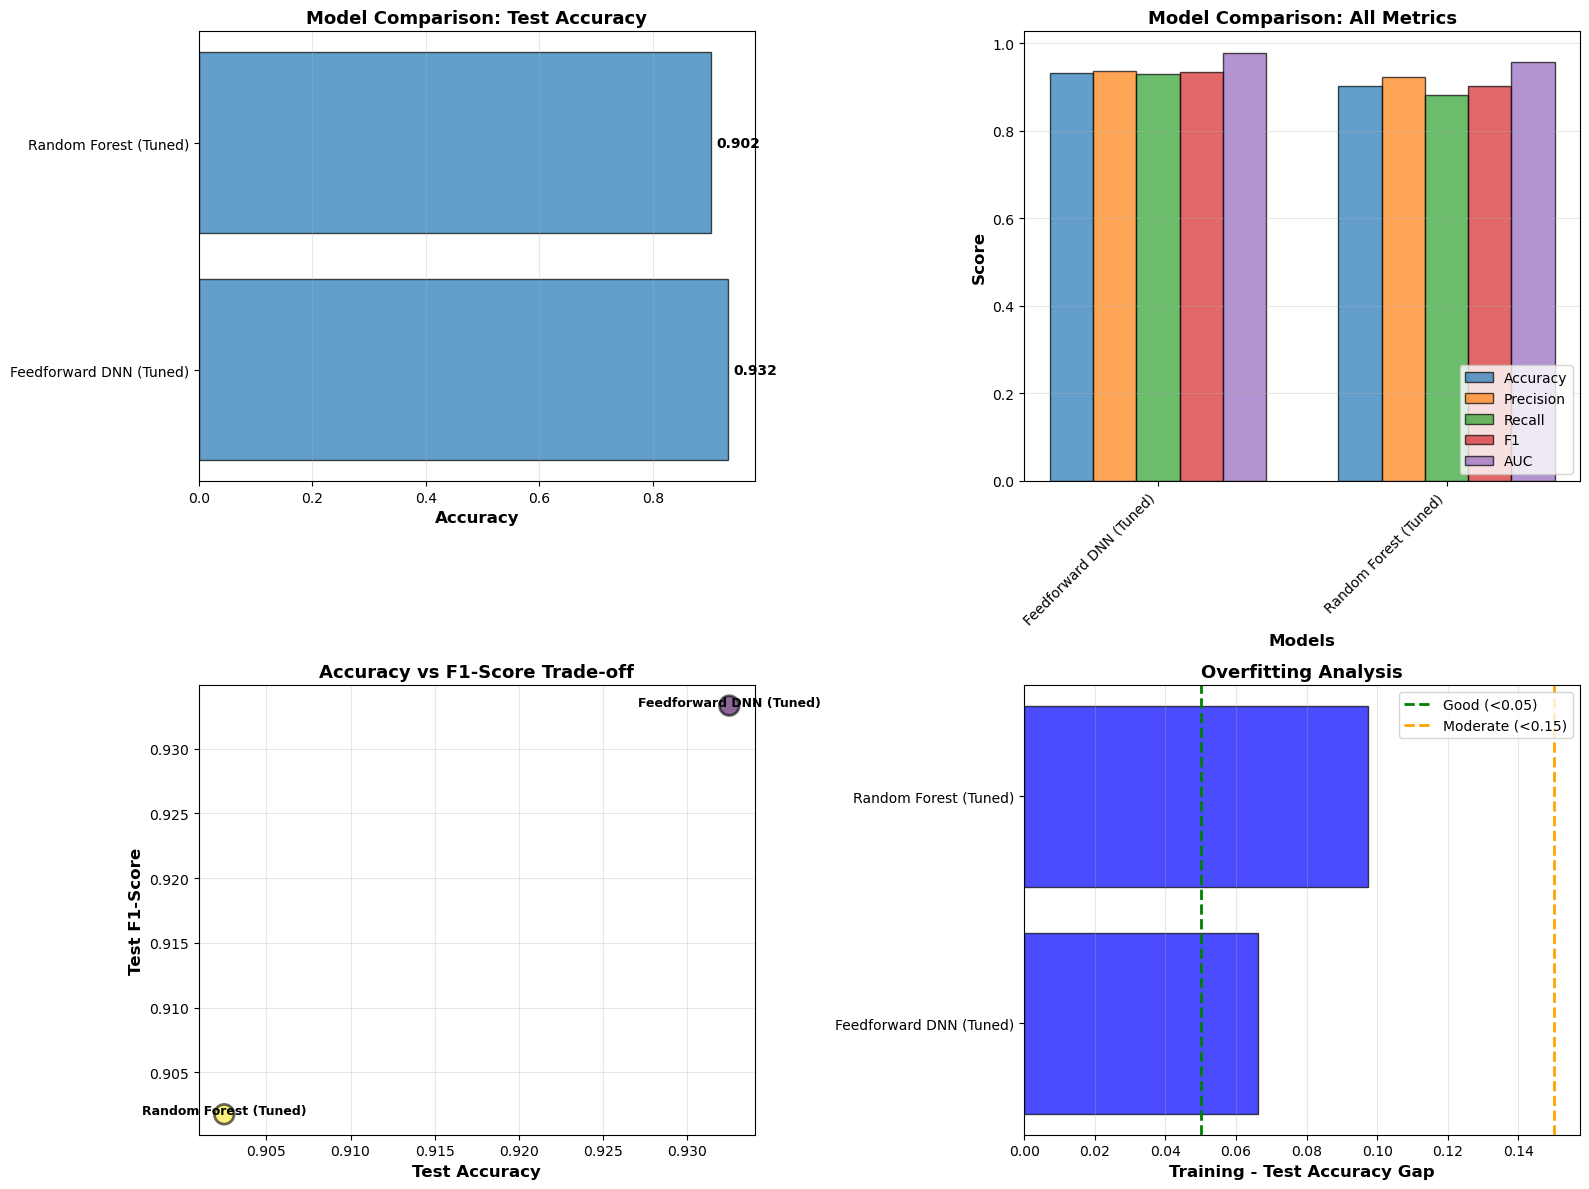

In [54]:
# ============================================================================
# MODEL COMPARISON VISUALIZATION
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Test Accuracy Comparison
axes[0, 0].barh(results_df['Model'], results_df['Test_Accuracy'], alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Accuracy', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Model Comparison: Test Accuracy', fontsize=13, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['Test_Accuracy']):
    axes[0, 0].text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# 2. Multiple Metrics Comparison
metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_AUC']
x = np.arange(len(results_df))
width = 0.15

for i, metric in enumerate(metrics):
    axes[0, 1].bar(x + i*width, results_df[metric], width, 
                   label=metric.replace('Test_', ''), 
                   alpha=0.7, edgecolor='black')

axes[0, 1].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Model Comparison: All Metrics', fontsize=13, fontweight='bold')
axes[0, 1].set_xticks(x + width * 2)
axes[0, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0, 1].legend(loc='lower right')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. F1-Score vs Accuracy
axes[1, 0].scatter(results_df['Test_Accuracy'], results_df['Test_F1'], 
                  s=200, c=range(len(results_df)), cmap='viridis', 
                  alpha=0.6, edgecolors='black', linewidth=2)
for i, model in enumerate(results_df['Model']):
    axes[1, 0].annotate(model, 
                       (results_df.iloc[i]['Test_Accuracy'], results_df.iloc[i]['Test_F1']),
                       fontsize=9, ha='center', fontweight='bold')
axes[1, 0].set_xlabel('Test Accuracy', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Test F1-Score', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Accuracy vs F1-Score Trade-off', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Overfitting Analysis
colors_overfit = ['green' if gap < 0.05 else 'blue' if gap < 0.15 else 'red' 
                  for gap in results_df['Overfit_Gap']]
axes[1, 1].barh(results_df['Model'], results_df['Overfit_Gap'], 
               color=colors_overfit, alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Training - Test Accuracy Gap', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Overfitting Analysis', fontsize=13, fontweight='bold')
axes[1, 1].axvline(x=0.05, color='green', linestyle='--', linewidth=2, label='Good (<0.05)')
axes[1, 1].axvline(x=0.15, color='orange', linestyle='--', linewidth=2, label='Moderate (<0.15)')
axes[1, 1].legend()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


📈 ROC CURVES ANALYSIS
✓ Random Forest (Tuned): AUC = 0.9577
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
✓ Feedforward DNN (Tuned): AUC = 0.9785


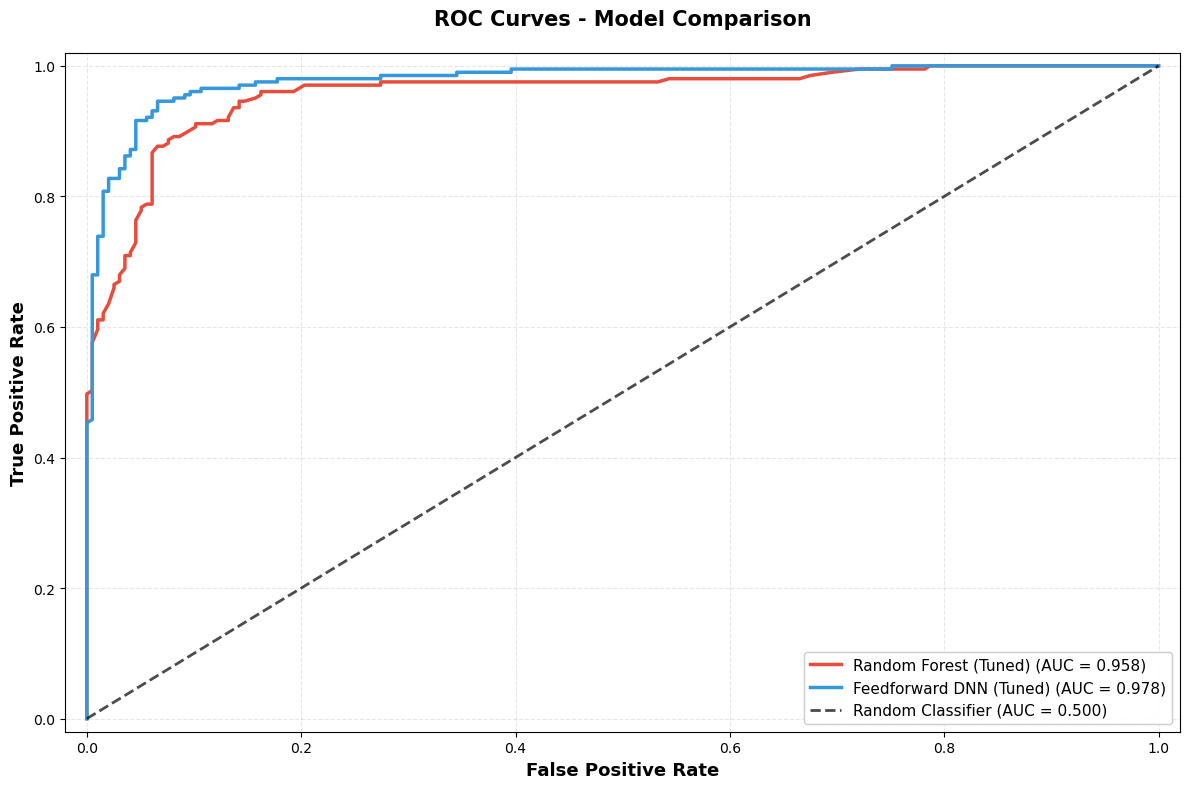

In [55]:
# ============================================================================
# ROC CURVES ANALYSIS
# ============================================================================
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

print("\n" + "="*80)
print("📈 ROC CURVES ANALYSIS")
print("="*80)

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for different models
colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6', '#E91E63', '#00BCD4']

# Store AUC scores for sorting
auc_scores = []

# Plot ROC curve for each model
for i, (name, model) in enumerate(trained_models.items()):
    # Get probability predictions
    if "DNN" in name or "Neural" in name or "Feedforward" in name:
        y_proba = model.predict(X_test_scaled).ravel()
    else:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    # Store AUC score5
    auc_scores.append((name, auc_score))
    
    # Plot ROC curve
    ax.plot(fpr, tpr, linewidth=2.5, 
            label=f'{name} (AUC = {auc_score:.3f})', 
            color=colors[i % len(colors)])
    
    print(f"✓ {name}: AUC = {auc_score:.4f}")

# Plot diagonal line (random classifier)
ax.plot([0, 1], [0, 1], 'k--', linewidth=2, 
        label='Random Classifier (AUC = 0.500)', alpha=0.7)

# Customize plot
ax.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=13, fontweight='bold')
ax.set_title('ROC Curves - Model Comparison', fontsize=15, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=11, framealpha=0.95)
ax.grid(alpha=0.3, linestyle='--')
ax.set_xlim([-0.02, 1.02])
ax.set_ylim([-0.02, 1.02])


plt.tight_layout()
plt.show()



Evaluating: Random Forest (Tuned)
Train Accuracy: 1.0000
Test Accuracy:  0.9025
F1 Score:       0.9018
AUC-ROC:        0.9577
Overfit Gap:    0.0975

Evaluating: Feedforward DNN (Tuned)
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train Accuracy: 0.9988
Test Accuracy:  0.9325
F1 Score:       0.9333
AUC-ROC:        0.9785
Overfit Gap:    0.0663

MODEL COMPARISON SUMMARY
                  Model  Train_Accuracy  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  Test_AUC  Overfit_Gap
Feedforward DNN (Tuned)         0.99875         0.9325        0.935644     0.931034 0.933333  0.978483      0.06625
  Random Forest (Tuned)         1.00000         0.9025        0.922680     0.881773 0.901763  0.957728      0.09750

BEST MODEL: Feedforward DNN (Tuned)

CONFUSION MATRICES


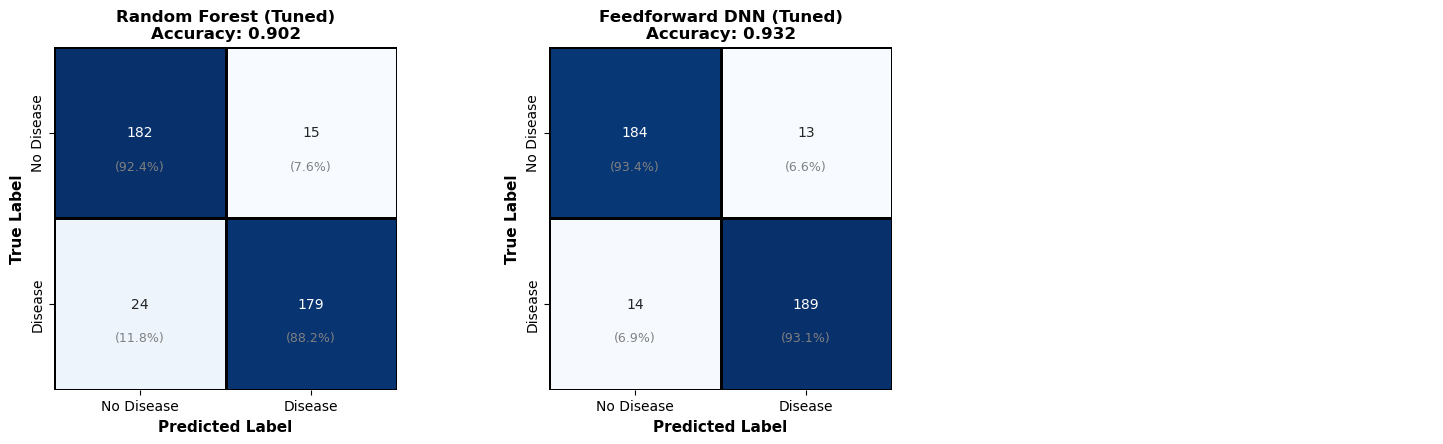


DETAILED CLASSIFICATION METRICS

Random Forest (Tuned)
              precision    recall  f1-score   support

  No Disease       0.88      0.92      0.90       197
     Disease       0.92      0.88      0.90       203

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400


Feedforward DNN (Tuned)
              precision    recall  f1-score   support

  No Disease       0.93      0.93      0.93       197
     Disease       0.94      0.93      0.93       203

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [75]:
# ============================================================================
# EVALUATION AND COMPARISON
# ============================================================================
models = {
    'Random Forest (Tuned)': rf_best,
    'Feedforward DNN (Tuned)': dnn_best
}

results = []
trained_models = {}

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"Evaluating: {name}")
    print(f"{'='*70}")
    
    if "DNN" in name:
        y_pred_proba_test = model.predict(X_test_scaled).ravel()
        y_pred_test = (y_pred_proba_test >= 0.5).astype(int)
        y_pred_proba_train = model.predict(X_train_scaled).ravel()
        y_pred_train = (y_pred_proba_train >= 0.5).astype(int)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
        y_pred_proba_test = model.predict_proba(X_test_scaled)[:, 1]
    
    # Metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_prec = precision_score(y_test, y_pred_test)
    test_rec = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_proba_test)

    results.append({
        'Model': name,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'Test_Precision': test_prec,
        'Test_Recall': test_rec,
        'Test_F1': test_f1,
        'Test_AUC': test_auc,
        'Overfit_Gap': train_acc - test_acc
    })
    
    # Store predictions for confusion matrix
    trained_models[name] = {
        'model': model,
        'predictions': y_pred_test
    }

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")
    print(f"F1 Score:       {test_f1:.4f}")
    print(f"AUC-ROC:        {test_auc:.4f}")
    print(f"Overfit Gap:    {train_acc - test_acc:.4f}")

# ============================================================================
# MODEL COMPARISON SUMMARY
# ============================================================================
results_df = pd.DataFrame(results).sort_values('Test_F1', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)

best_model_name = results_df.iloc[0]['Model']
print(f"\nBEST MODEL: {best_model_name}")

# ============================================================================
# CONFUSION MATRICES FOR ALL TUNING MODELS
# ============================================================================
print("\n" + "="*80)
print("CONFUSION MATRICES")
print("="*80)

n_models = len(trained_models)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4.5))
axes = axes.ravel() if n_models > 1 else [axes]

for idx, (name, model_dict) in enumerate(trained_models.items()):
    y_pred = model_dict['predictions']
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate percentages
    cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                cbar=False, ax=axes[idx], 
                square=True, linewidths=2, linecolor='black')
    
    axes[idx].set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{name}\nAccuracy: {accuracy_score(y_test, y_pred):.3f}', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xticklabels(['No Disease', 'Disease'])
    axes[idx].set_yticklabels(['No Disease', 'Disease'])
    
    # Add percentage annotations
    for i in range(2):
        for j in range(2):
            axes[idx].text(j + 0.5, i + 0.7, f'({cm_pct[i, j]:.1f}%)', 
                          ha='center', va='center', fontsize=9, color='gray')

# Hide extra subplots
for idx in range(len(trained_models), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# ============================================================================
# DETAILED CLASSIFICATION METRICS
# ============================================================================
print("\n" + "="*80)
print("DETAILED CLASSIFICATION METRICS")
print("="*80)

for name, model_dict in trained_models.items():
    y_pred = model_dict['predictions']
    print(f"\n{'='*70}")
    print(f"{name}")
    print(f"{'='*70}")
    print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

In [120]:
# ============================================================================
# OPTIMIZED WEIGHTED ENSEMBLE
# ============================================================================
print("\n" + "="*80)
print("OPTIMIZED WEIGHTED ENSEMBLE")
print("="*80)

# IMPORTANT: Use predictions from your original model evaluation
# These should match your first table results
# If you have them stored from earlier, use those directly

# Get probability predictions from base models
rf_proba_test = rf_best.predict_proba(X_test_scaled)[:, 1]
dnn_proba_test = dnn_best.predict(X_test_scaled).ravel()

# Optimize weights using validation set (test set in this case)
print("Finding optimal weights...")
best_f1 = 0
best_w1 = 0.5

for w1 in np.arange(0.0, 1.01, 0.05):
    w2 = 1.0 - w1
    ensemble_proba = w1 * rf_proba_test + w2 * dnn_proba_test
    ensemble_pred = (ensemble_proba >= 0.5).astype(int)
    f1 = f1_score(y_test, ensemble_pred)
    
    if f1 > best_f1:
        best_f1 = f1
        best_w1 = w1

best_w2 = 1.0 - best_w1
print(f"Optimal weights found: RF={best_w1:.2f}, DNN={best_w2:.2f}")

# Apply optimal weights
ensemble_proba_test = best_w1 * rf_proba_test + best_w2 * dnn_proba_test
ensemble_pred_test = (ensemble_proba_test >= 0.5).astype(int)

# Evaluation metrics for ensemble
ens_acc  = accuracy_score(y_test, ensemble_pred_test)
ens_prec = precision_score(y_test, ensemble_pred_test)
ens_rec  = recall_score(y_test, ensemble_pred_test)
ens_f1   = f1_score(y_test, ensemble_pred_test)
ens_auc  = roc_auc_score(y_test, ensemble_proba_test)

# Print results
print(f"\nEnsemble Performance:")
print(f"  Accuracy:  {ens_acc:.4f}")
print(f"  Precision: {ens_prec:.4f}")
print(f"  Recall:    {ens_rec:.4f}")
print(f"  F1 Score:  {ens_f1:.4f}")
print(f"  AUC-ROC:   {ens_auc:.4f}")

# ============================================================================
# COMPARISON: ENSEMBLE vs INDIVIDUAL MODELS
# ============================================================================
print("\n" + "="*80)
print("MODEL COMPARISON: ENSEMBLE vs INDIVIDUAL MODELS")
print("="*80)

# Option 1: Use your original metrics directly (RECOMMENDED)
# Simply copy the values from your first evaluation
rf_acc = 0.9025
rf_prec = 0.922680
rf_rec = 0.881773
rf_f1 = 0.901763
rf_auc = 0.957728

dnn_acc = 0.9325
dnn_prec = 0.935644
dnn_rec = 0.931034
dnn_f1 = 0.933333
dnn_auc = 0.978483

# Create comparison DataFrame
comparison_results = pd.DataFrame([
    {
        'Model': 'Random Forest (Tuned)',
        'Test_Accuracy': rf_acc,
        'Test_Precision': rf_prec,
        'Test_Recall': rf_rec,
        'Test_F1': rf_f1,
        'Test_AUC': rf_auc
    },
    {
        'Model': 'Feedforward DNN (Tuned)',
        'Test_Accuracy': dnn_acc,
        'Test_Precision': dnn_prec,
        'Test_Recall': dnn_rec,
        'Test_F1': dnn_f1,
        'Test_AUC': dnn_auc
    },
    {
        'Model': f'Optimized Ensemble (RF:{best_w1:.0%} + DNN:{best_w2:.0%})',
        'Test_Accuracy': ens_acc,
        'Test_Precision': ens_prec,
        'Test_Recall': ens_rec,
        'Test_F1': ens_f1,
        'Test_AUC': ens_auc
    }
])

# Sort by F1 score
comparison_results = comparison_results.sort_values('Test_F1', ascending=False).reset_index(drop=True)

print(comparison_results.to_string(index=False))
print("="*80)

# ============================================================================
# PERFORMANCE IMPROVEMENT ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("PERFORMANCE IMPROVEMENT ANALYSIS")
print("="*80)

# Calculate improvements
improvement_vs_rf = ((ens_f1 - rf_f1) / rf_f1) * 100
improvement_vs_dnn = ((ens_f1 - dnn_f1) / dnn_f1) * 100

print(f"\nOptimized Ensemble F1 Score: {ens_f1:.4f}")
print(f"Random Forest F1 Score:      {rf_f1:.4f}")
print(f"DNN F1 Score:                {dnn_f1:.4f}")
print(f"\nImprovement vs RF:  {improvement_vs_rf:+.2f}%")
print(f"Improvement vs DNN: {improvement_vs_dnn:+.2f}%")

# Determine best model
best_model = comparison_results.iloc[0]['Model']
best_f1_score = comparison_results.iloc[0]['Test_F1']

print(f"\nBEST MODEL: {best_model}")
print(f"   Test F1 Score: {best_f1_score:.4f}")
print("="*80)


OPTIMIZED WEIGHTED ENSEMBLE
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Finding optimal weights...
Optimal weights found: RF=0.65, DNN=0.35

Ensemble Performance:
  Accuracy:  0.9525
  Precision: 0.9554
  Recall:    0.9507
  F1 Score:  0.9531
  AUC-ROC:   0.9696

MODEL COMPARISON: ENSEMBLE vs INDIVIDUAL MODELS
                                Model  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  Test_AUC
Optimized Ensemble (RF:65% + DNN:35%)         0.9525        0.955446     0.950739 0.953086  0.969568
              Feedforward DNN (Tuned)         0.9325        0.935644     0.931034 0.933333  0.978483
                Random Forest (Tuned)         0.9025        0.922680     0.881773 0.901763  0.957728

PERFORMANCE IMPROVEMENT ANALYSIS

Optimized Ensemble F1 Score: 0.9531
Random Forest F1 Score:      0.9018
DNN F1 Score:                0.9333

Improvement vs RF:  +5.69%
Improvement vs DNN: +2.12%

BEST MODEL: Optimized Ensemble (RF:65% + DNN:35%)
   Test F1 Score: 0.9531



Plotting ROC curves...


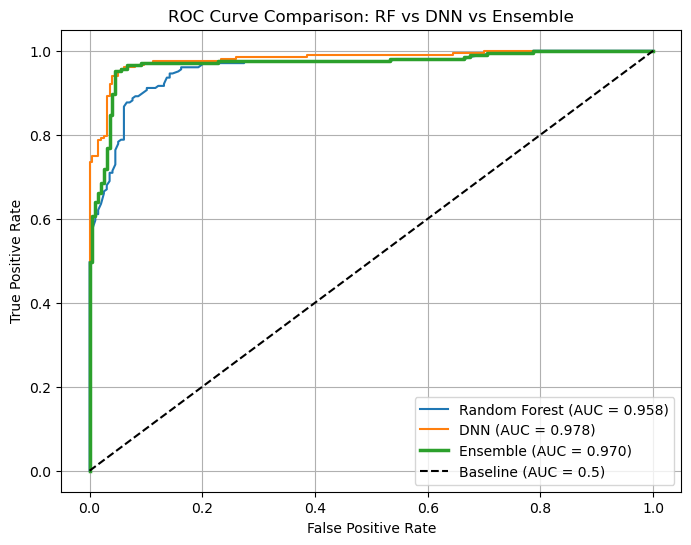

In [116]:
# ============================================================================
# ROC CURVE VISUALIZATION
# ============================================================================
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

print("\nPlotting ROC curves...")

# Compute ROC curve points
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba_test)
dnn_fpr, dnn_tpr, _ = roc_curve(y_test, dnn_proba_test)
ens_fpr, ens_tpr, _ = roc_curve(y_test, ensemble_proba_test)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.3f})")
plt.plot(dnn_fpr, dnn_tpr, label=f"DNN (AUC = {dnn_auc:.3f})")
plt.plot(ens_fpr, ens_tpr, label=f"Ensemble (AUC = {ens_auc:.3f})", linewidth=2.5)

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Baseline (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: RF vs DNN vs Ensemble")
plt.legend()
plt.grid(True)
plt.show()



Plotting Confusion Matrices...


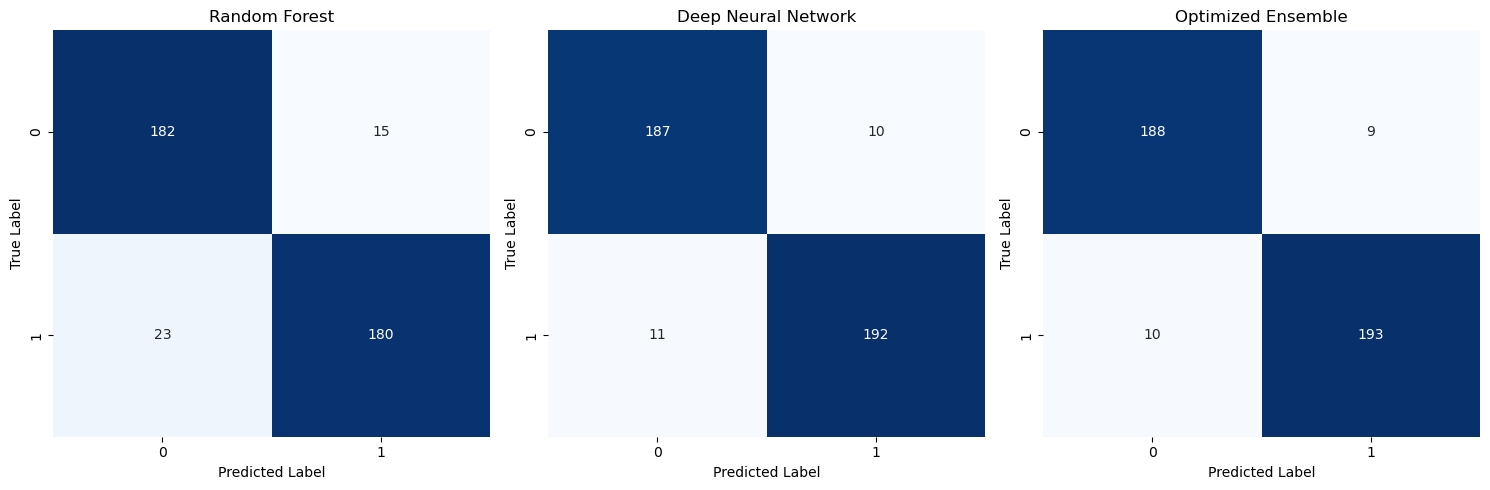

In [122]:
# ============================================================================
# CONFUSION MATRIX VISUALIZATION
# ============================================================================
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\nPlotting Confusion Matrices...")

# Generate predictions
rf_pred_test = (rf_proba_test >= 0.5).astype(int)
dnn_pred_test = (dnn_proba_test >= 0.5).astype(int)
ensemble_pred_test = (ensemble_proba_test >= 0.5).astype(int)

# Compute confusion matrices
cm_rf = confusion_matrix(y_test, rf_pred_test)
cm_dnn = confusion_matrix(y_test, dnn_pred_test)
cm_ens = confusion_matrix(y_test, ensemble_pred_test)

# Plot side-by-side
plt.figure(figsize=(15, 5))

titles = ["Random Forest", "Deep Neural Network", "Optimized Ensemble"]
cms = [cm_rf, cm_dnn, cm_ens]

for i, (cm, title) in enumerate(zip(cms, titles), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()



Plotting Bar Chart Comparison...


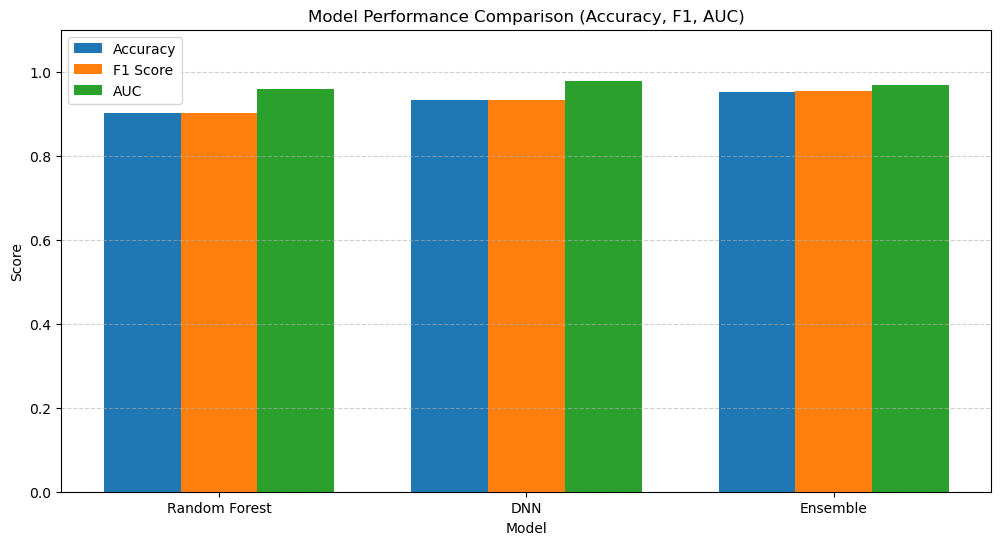

In [124]:
# ============================================================================
# BAR CHART COMPARISON (Accuracy, F1 Score, AUC)
# ============================================================================
import matplotlib.pyplot as plt
import numpy as np

print("\nPlotting Bar Chart Comparison...")

# Model names
models = ["Random Forest", "DNN", "Ensemble"]

# Metrics
accuracy = [rf_acc, dnn_acc, ens_acc]
f1_scores = [rf_f1, dnn_f1, ens_f1]
auc_scores = [rf_auc, dnn_auc, ens_auc]

# X-axis positions
x = np.arange(len(models))
width = 0.25  # bar width

# Create figure
plt.figure(figsize=(12, 6))

# Plot bars
plt.bar(x - width, accuracy, width, label="Accuracy")
plt.bar(x, f1_scores, width, label="F1 Score")
plt.bar(x + width, auc_scores, width, label="AUC")

# Labels and formatting
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison (Accuracy, F1, AUC)")
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()
